In [3]:
import pandas as pd 

#leitura do dataset
water_df = pd.read_csv("water_potability.csv")
#checar valores nulos
print(water_df.isnull().sum())
#remover os nulos
water_df.dropna(inplace=True)


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [4]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [6]:
#obtem os valores de água potável
drinkable = water_df.loc[water_df["Potability"] == 1]
#obtem os valores de água não potável
non_drinkable = water_df.loc[water_df["Potability"] == 0]
#checa a quantidade
print(len(drinkable),len(non_drinkable))


811 1200


In [11]:
from sklearn.utils import resample
from sklearn.utils import shuffle
#reorganiza o tamnho do dataset de água potável para manter a mesma quantidade de não potável
reshaped_df = resample(drinkable, replace=True, n_samples=1200)
water_df = pd.concat([reshaped_df,non_drinkable])
#embaralha as linhas do df
water_df = shuffle(water_df)
print(water_df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [21]:
from sklearn.model_selection import train_test_split
#obtém as features, removendo o target
X = water_df.drop(columns="Potability")
#obtém o target
y = water_df["Potability"]
#obtém a quantidade de feature e target para treinamento e teste. Nesse caso, a quantidade de teste é de 25% do total
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [22]:
from sklearn.tree import DecisionTreeClassifier
#define a altura da árvore e cria classe da árvore
tree = DecisionTreeClassifier(max_depth=3)
#define a árvore de decisão com base nos dados de treinamento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
from sklearn.inspection import DecisionBoundaryDisplay
#resultado da predição seguindo as features de teste 
result = tree.predict(X_test)
#determinação da acurácia final
accuracy = tree.score(X_test,y_test)
print(round(accuracy,2))

0.6


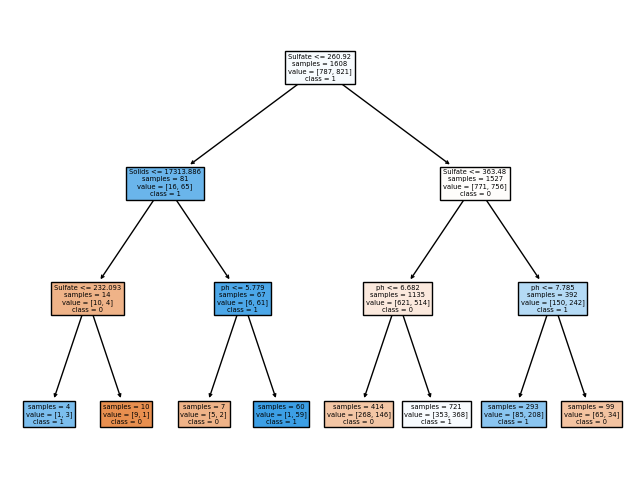

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#plotagem da árvore de decisão
_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=X.columns.to_list(),
              class_names=tree.classes_.astype("str"), impurity=False, ax=ax, filled=True)